In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_excel("batdongsan_data.xlsm")
df.head()

,Tiêu đề,Giá,Diện tích,Giá/m²,Phòng ngủ,WC,Địa điểm
0,TIN THẬT 100% - BÁN NHÀ RIÊNG 134/1... CÁCH MẠ...,40 tỷ,328 m²,"121,95 tr/m²",23 Phòng ngủ,21 WC,·
1,BÁN NHÀ NGUYỄN ĐỨC CẢNH_61M2_MT 4.4M_THANG MÁY...,"23,5 tỷ",61 m²,"385,25 tr/m²",NaN,NaN,·
2,BÁN NHÀ RIÊNG CHÍNH CHỦ Q. BÌNH THẠNH,14 tỷ,97 m²,"144,33 tr/m²",4 Phòng ngủ,5 WC,·
3,"BÁN NHÀ CHÍNH CHỦ, DÂN XÂY TẠI MỄ TRÌ - NAM TỪ...","10,9 tỷ",63 m²,"173,02 tr/m²",10 Phòng ngủ,10 WC,·
4,SIÊU PHẨM LINH ĐƯỜNG -6 TẦNG - Ô TÔ VÀO NHÀ - ...,"12,3 tỷ",45 m²,"273,33 tr/m²",9 Phòng ngủ,10 WC,·


In [3]:
df.dropna(how='all', inplace=True)

In [4]:
df['Địa điểm'] = df['Địa điểm'].fillna('').str.strip()

In [5]:
df[['Quận/Huyện', 'Tỉnh/Thành']] = df['Địa điểm'].str.extract(r'(?P<Quận_Huyện>[^,]+),\s*(?P<Tinh_Thanh>.+)')

In [12]:
def convert_gia(value):
    try:
        value = str(value).strip().lower().replace(',', '.')
        if 'tỷ' in value:
            return float(value.replace('tỷ', '').strip())
        elif 'triệu' in value:
            return float(value.replace('triệu', '').strip()) / 1000
        else:
            return float(value)  # đã là số hợp lệ
    except:
        return None  # hoặc np.nan nếu muốn

In [8]:
df['Diện tích'] = df['Diện tích'].astype(str).str.replace('m²', '', regex=False).str.replace(',', '.').str.strip()

# Xử lý những giá trị không chuyển đổi được (vd: 'nan')
df['Diện tích'] = pd.to_numeric(df['Diện tích'], errors='coerce')  # Chuyển không hợp lệ thành NaN


In [14]:
# Làm sạch Giá (theo tỷ đồng)
df['Giá'] = df['Giá'].apply(convert_gia)

In [16]:
df['Phòng ngủ'] = df['Phòng ngủ'].str.extract(r'(\d+)').astype(float)
df['WC'] = df['WC'].str.extract(r'(\d+)').astype(float)

In [18]:
df['Giá/m² tính lại'] = round(df['Giá'] * 1e9 / df['Diện tích'], 2)  # đơn vị VND

In [20]:
df['Giá/m²'] = df['Giá/m²'].str.replace('tr/m²', '').str.strip()
df['Giá/m²'] = pd.to_numeric(df['Giá/m²'], errors='coerce')

In [22]:
gia_tb_theo_tinh = df.groupby('Tỉnh/Thành')['Giá'].mean()
print(gia_tb_theo_tinh)

Tỉnh/Thành
Bà Rịa Vũng Tàu     6.030000
Bình Dương          4.480714
Bình Phước          2.600000
Bình Thuận          2.300000
Bến Tre             6.000000
Cần Thơ             3.370000
Hà Nội             14.560387
Hải Phòng           6.821111
Hồ Chí Minh        11.365628
Khánh Hòa           6.932727
Long An             2.758333
Lâm Đồng            9.860000
Quảng Nam          12.200000
Quảng Ngãi          2.950000
Quảng Ninh         20.900000
Thanh Hóa           5.990000
Thái Nguyên        23.960000
Tiền Giang          1.970000
Đà Nẵng             9.177368
Đồng Nai            2.661875
Name: Giá, dtype: float64


In [24]:
so_cai_co_dia_diem = df['Tỉnh/Thành'].notna().sum()
print("Số căn có thông tin địa điểm:", so_cai_co_dia_diem)

Số căn có thông tin địa điểm: 936


In [26]:
top5_gia_m2 = df.sort_values(by='Giá/m² tính lại', ascending=False).head(5)
print(top5_gia_m2[['Tiêu đề', 'Giá', 'Diện tích', 'Giá/m² tính lại']])

                                               Tiêu đề   Giá  Diện tích  \
762    Nhà 1000m² full thổ, tiện phân lô, xây biệt thự  42.0      1.000   
576  Bán nhà riêng đẹp tại Gia Sàng, Thái Nguyên, 4...  45.0      1.700   
128  Cần nhà đất 2 sổ riêng tại Thủ Dầu Một 1.066m2...  11.5      1.066   
863    Nhà vườn mát - rộng - yên tĩnh - cây xanh nhiều   7.0      1.000   
239  Bán Nhà Riêng đẹp tại Huyện Lộ 173, Xã Tường Đ...   6.0      1.900   

     Giá/m² tính lại  
762     4.200000e+10  
576     2.647059e+10  
128     1.078799e+10  
863     7.000000e+09  
239     3.157895e+09  


In [28]:
phong_ngu_tb = df.groupby('Tỉnh/Thành')['Phòng ngủ'].mean()
print(phong_ngu_tb)

Tỉnh/Thành
Bà Rịa Vũng Tàu    3.400000
Bình Dương         3.461538
Bình Phước         4.000000
Bình Thuận              NaN
Bến Tre            3.000000
Cần Thơ            2.000000
Hà Nội             6.132530
Hải Phòng          4.222222
Hồ Chí Minh        5.424908
Khánh Hòa          3.272727
Long An            3.833333
Lâm Đồng           2.000000
Quảng Nam          2.000000
Quảng Ngãi              NaN
Quảng Ninh              NaN
Thanh Hóa          4.000000
Thái Nguyên        4.000000
Tiền Giang         3.000000
Đà Nẵng            6.000000
Đồng Nai           3.000000
Name: Phòng ngủ, dtype: float64


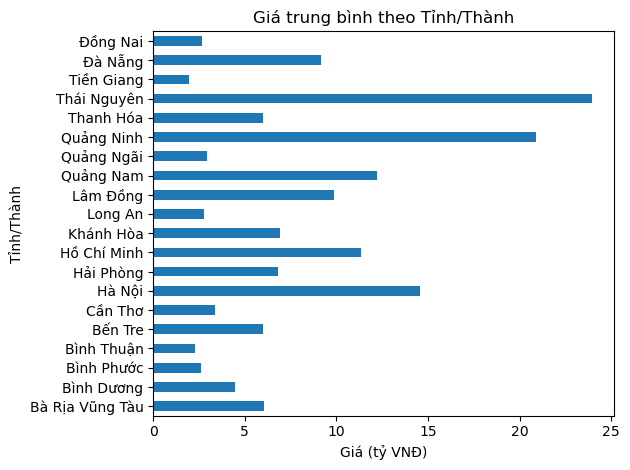

In [32]:
# Biểu đồ giá trung bình theo tỉnh
gia_tb_theo_tinh.plot(kind='barh', title='Giá trung bình theo Tỉnh/Thành')
plt.xlabel('Giá (tỷ VNĐ)')
plt.tight_layout()
plt.show()

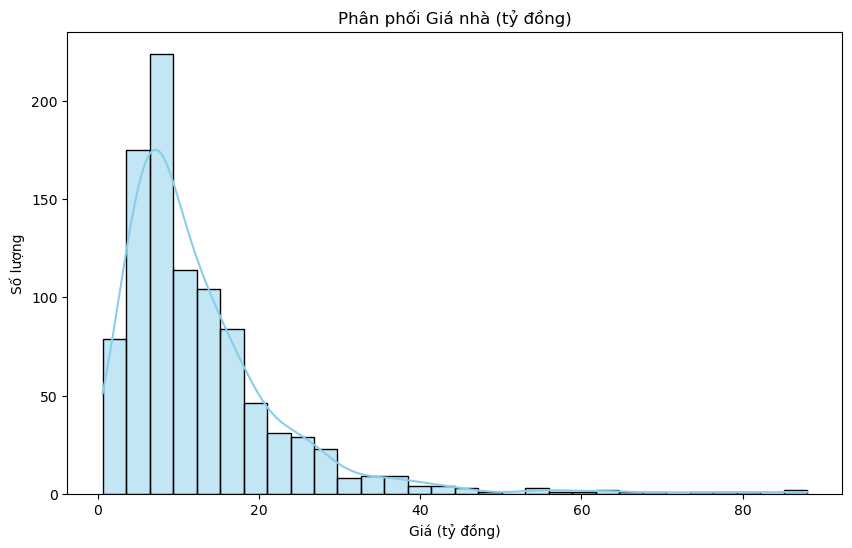

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Giá'], bins=30, kde=True, color='skyblue')
plt.title('Phân phối Giá nhà (tỷ đồng)')
plt.xlabel('Giá (tỷ đồng)')
plt.ylabel('Số lượng')
plt.show()

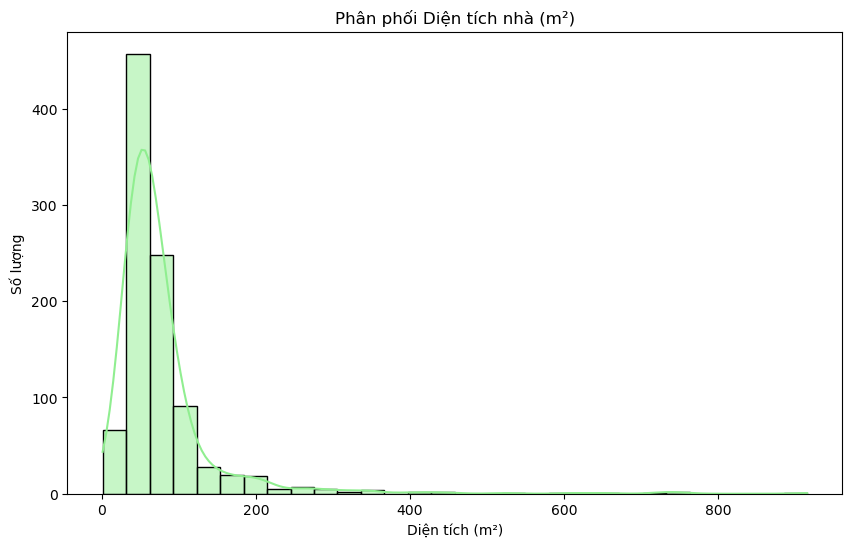

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Diện tích'], bins=30, kde=True, color='lightgreen')
plt.title('Phân phối Diện tích nhà (m²)')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Số lượng')
plt.show()

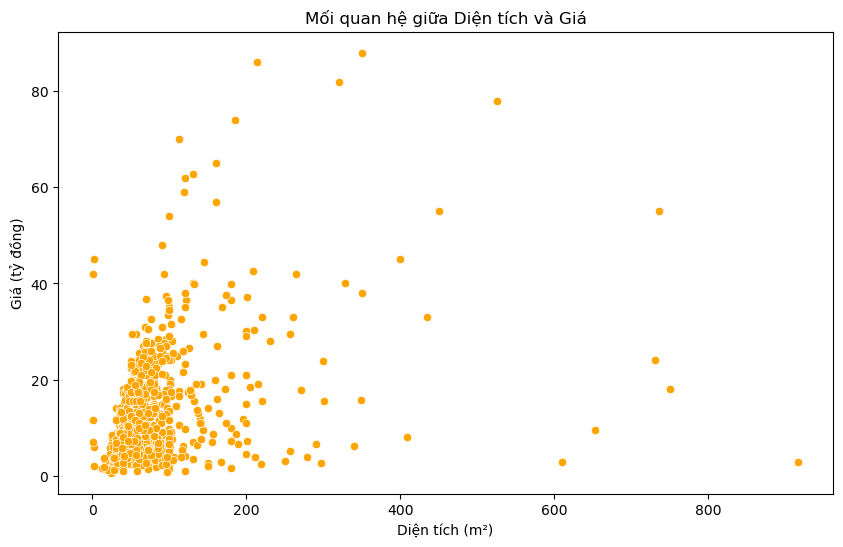

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Diện tích', y='Giá', color='orange')
plt.title('Mối quan hệ giữa Diện tích và Giá')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Giá (tỷ đồng)')
plt.show()

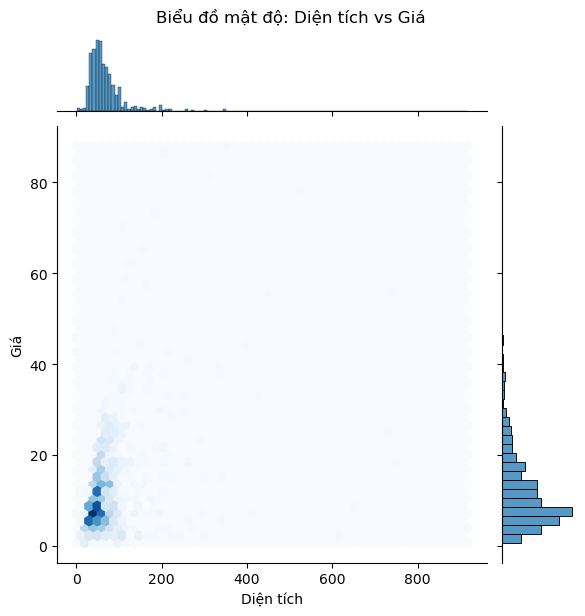

In [54]:
sns.jointplot(data=df, x='Diện tích', y='Giá', kind='hex', cmap='Blues')
plt.suptitle('Biểu đồ mật độ: Diện tích vs Giá', y=1.02)
plt.show()

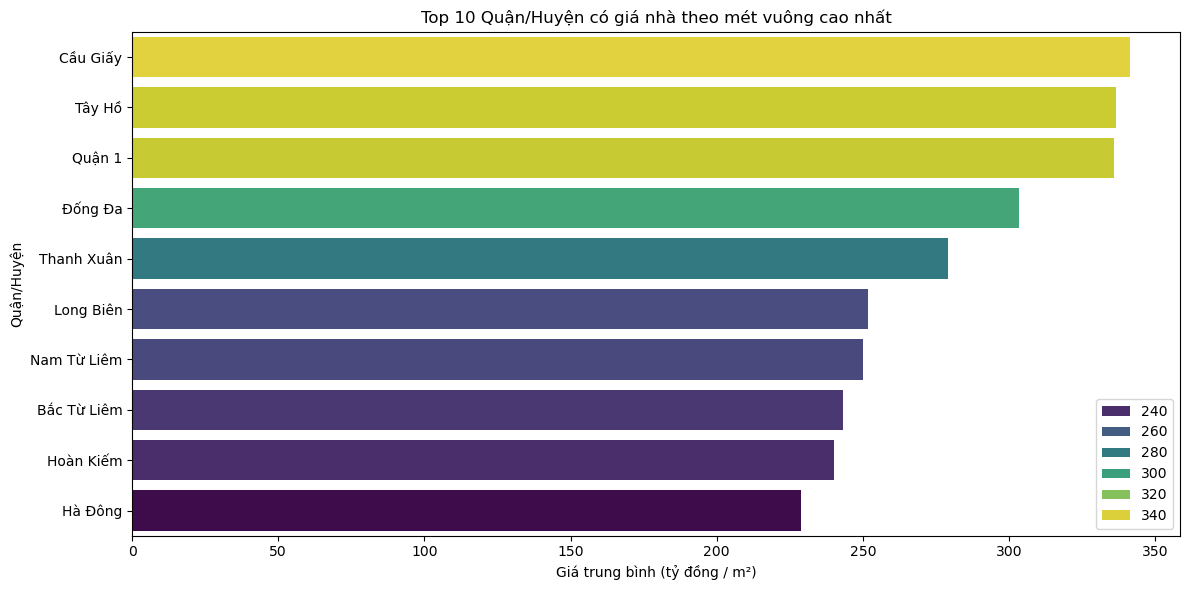

In [60]:
top_quan = df.groupby('Quận/Huyện')['Giá/m²'].mean().sort_values(ascending=False).head(10)

# Bước 4: Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=top_quan.values, hue=top_quan.values, y=top_quan.index, palette='viridis')
plt.title('Top 10 Quận/Huyện có giá nhà theo mét vuông cao nhất')
plt.xlabel('Giá trung bình (tỷ đồng / m²)')
plt.ylabel('Quận/Huyện')
plt.tight_layout()
plt.show()